## Regression.

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns

In [300]:
#  Import Data.
folder_name = 'case_study_datasets'
df = pd.read_csv(folder_name + '/cars_sampled.csv')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 00:00,20257,07/04/2016 04:44
1,07/03/2016 09:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,07/03/2016 00:00,88045,26/03/2016 13:17
2,01/04/2016 00:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 00:00,27449,01/04/2016 08:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 00:00,34537,07/04/2016 04:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 00:00,55270,01/04/2016 23:18


In [301]:
# set plot style
sns.set(
    rc={
        'figure.figsize': (11.7,8.27),
    }
)


In [302]:
cars = df.copy()

In [303]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [304]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [305]:
cars.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [306]:
# sumarrize the data
"""
This is done to convert all the values that contain "0e+04" to float.
"""
# display in float format.
pd.set_option(
    'display.float_format', lambda x: '%.3f' % x
)
cars.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [307]:
print(df.count())
# limit to 500 rows
pd.set_option(
    "display.max_rows", 500
)

dateCrawled            50001
name                   50001
seller                 50001
offerType              50001
price                  50001
abtest                 50001
vehicleType            44813
yearOfRegistration     50001
gearbox                47177
powerPS                50001
model                  47243
kilometer              50001
monthOfRegistration    50001
fuelType               45498
brand                  50001
notRepairedDamage      40285
dateCreated            50001
postalCode             50001
lastSeen               50001
dtype: int64


In [308]:
"""
Dropping unwanted columns.
ie. name, dateCrawled, dateCreated, postalCode, lastSeen
"""
cars = cars.drop(
    columns=['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen'],
    
)

In [309]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               50001 non-null  object
 1   offerType            50001 non-null  object
 2   price                50001 non-null  int64 
 3   abtest               50001 non-null  object
 4   vehicleType          44813 non-null  object
 5   yearOfRegistration   50001 non-null  int64 
 6   gearbox              47177 non-null  object
 7   powerPS              50001 non-null  int64 
 8   model                47243 non-null  object
 9   kilometer            50001 non-null  int64 
 10  monthOfRegistration  50001 non-null  int64 
 11  fuelType             45498 non-null  object
 12  brand                50001 non-null  object
 13  notRepairedDamage    40285 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.3+ MB


In [310]:
# find the number of duplicate values in each column
cars.duplicated().sum()

470

In [311]:
# Check for duplicate records and keep the first occurence.
cars.drop_duplicates(
    keep='first',
    inplace=True
    )

In [312]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


## Data Cleaning.

In [313]:
"""
Total number of rows 50001
Total number of duplicates 470
Removed unwanted columns like dateCrawled, dateCreated, postalCode, lastSeen

"""

'\nTotal number of rows 50001\nTotal number of duplicates 470\nRemoved unwanted columns like dateCrawled, dateCreated, postalCode, lastSeen\n\n'

In [314]:
# Check for missing values.
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [315]:
# unique values where the cols have null values.
print(f"fuelType:  {cars.fuelType.unique()}")
print(f"notRepairedDamage:  {cars.notRepairedDamage.unique()}")
print(f"gearbox:  {cars.gearbox.unique()}")
print(f"vehicleType:  {cars.vehicleType.unique()}")

fuelType:  ['diesel' 'petrol' nan 'cng' 'lpg' 'hybrid' 'electro' 'other']
notRepairedDamage:  [nan 'no' 'yes']
gearbox:  ['manual' 'automatic' nan]
vehicleType:  ['limousine' 'suv' 'bus' 'small car' 'station wagon' 'coupe' nan 'others'
 'cabrio']


In [316]:
# yearOfRegistration
print(f"yearOfRegistration:  {cars.yearOfRegistration.unique()}")

yearOfRegistration:  [2003 2005 2006 2008 1995 1996 1997 2001 2016 1999 1993 2002 1998 2017
 1992 1991 2000 2011 2004 2009 1979 2010 2007 1952 1972 1994 2013 2018
 2012 1989 2014 2015 1990 1988 1970 1961 1960 1966 2019 1983 1964 1971
 1975 1987 1980 1977 1976 1974 1978 1962 1938 1967 1986 1910 1985 1959
 1982 1981 1984 1950 1945 1965 1958 1973 1955 1956 1963 1933 1936 1928
 9999 1000 1968 1940 1969 1954 1957 1934 3500 1929 6000 7500 5000 8500
 2900 1943 1951 1500 3000 7800 2222 1941 3800 1947 1953 1255 8888]


In [317]:
"""Variable of yearOfRegistration has null values."""
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()

# count of yearOfRegistration
one = sum(
    cars['yearOfRegistration'] > 2022
)
    
two = sum(
    cars['yearOfRegistration'] < 1950
)
print(
    f"yearOfRegistration before 2022: {one}, after 1950: {two}"
)

yearOfRegistration before 2022: 24, after 1950: 38


<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

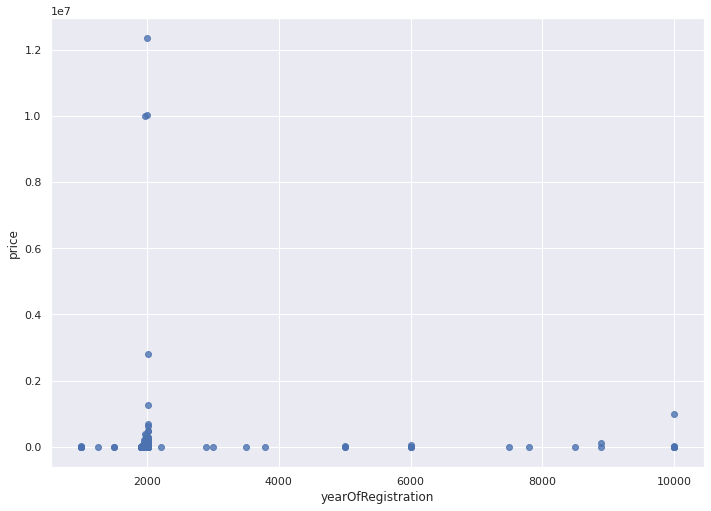

In [318]:
# plot year of registration and price.
sns.regplot(
    x='yearOfRegistration',
    y='price',
    scatter=True,
    fit_reg=False,
    data=cars
)

/home/novasangeeth/work/pytest-workouts/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='price'>

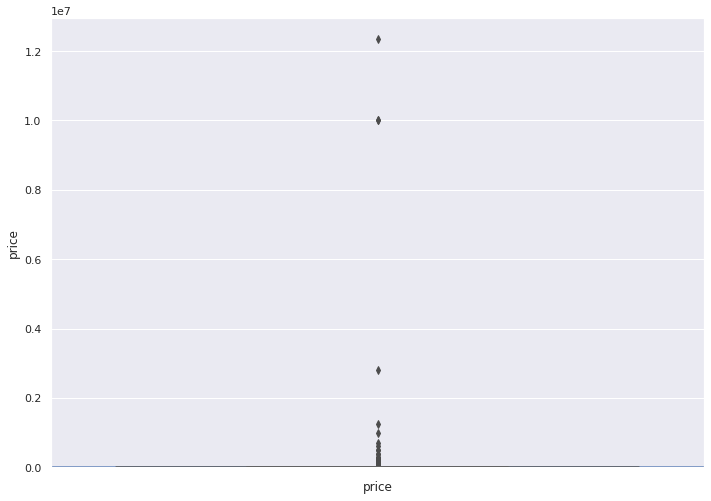

In [319]:
"""Plot Price."""
sns.distplot(
    cars['price'],
)
"""Box plot of price `"""
sns.boxplot(
    y='price',
    data=cars
)


In [320]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,49531.000,49531.000,49531.000,49531.000,49531.000
mean,6567.220,2005.560,116.501,125645.555,5.740
std,86222.378,123.572,231.536,40193.890,3.710
min,0.000,1000.000,0.000,5000.000,0.000
25%,1150.000,1999.000,69.000,125000.000,3.000
50%,2950.000,2003.000,105.000,150000.000,6.000
75%,7100.000,2008.000,150.000,150000.000,9.000
max,12345678.000,9999.000,19312.000,150000.000,12.000


In [321]:
"""Variable of price."""
price_count = cars['price'].value_counts().sort_index()
print(sum(cars['price'] > 1500000))
print(sum(cars['price'] < 100))

4
1748


In [322]:
"""Variable for Power values"""
power_count = cars['powerPS'].value_counts().sort_index()


/home/novasangeeth/work/pytest-workouts/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

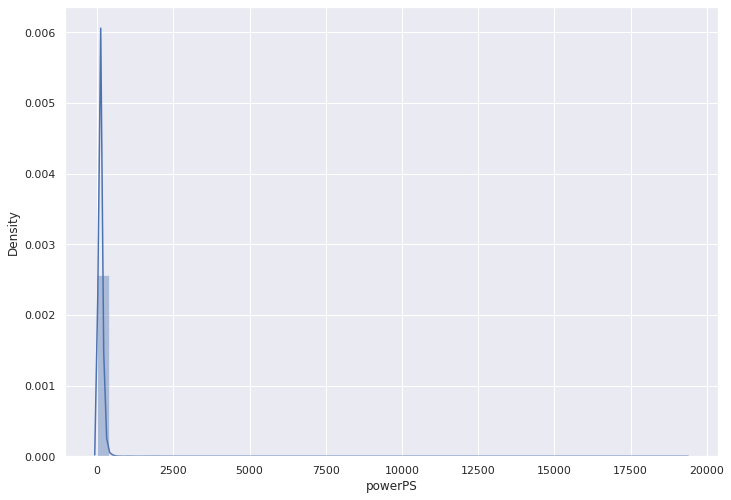

In [323]:
"""dist plot for power"""
sns.distplot(
    cars['powerPS'],
)

<AxesSubplot:ylabel='powerPS'>

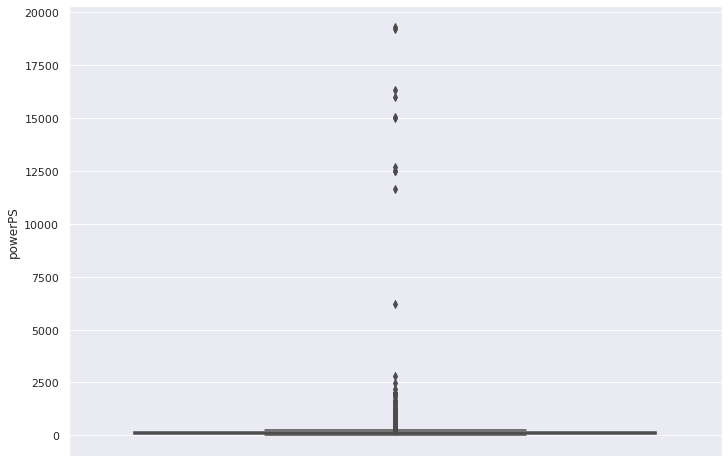

In [324]:
"""Box plot for power"""
sns.boxplot(
    y='powerPS',
    data=cars
)


<AxesSubplot:xlabel='powerPS', ylabel='price'>

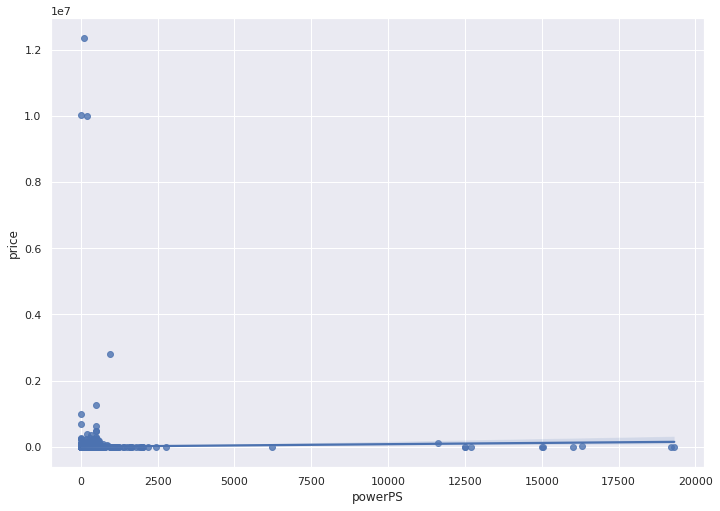

In [325]:
"""Scatter plot for power and price"""
sns.regplot(
    x='powerPS',
    y='price',
    scatter=True,
    data=cars
)

In [326]:
"""finding the sum of cars that have horse power greater than 50 and less than 700"""
print(sum(cars['powerPS'] > 50))
print(sum(cars['powerPS'] < 700))

42617
49476


In [327]:
"""finding the sum of cars that have horse power greater than 500 and less than 10"""
print(sum(cars['powerPS'] > 500))
print(sum(cars['powerPS'] < 10))

115
5565


In [328]:
"""
WORKING RANGE:
    PRICE: 100 - 1500000
    POWER: 50 - 700
"""

'\nWORKING RANGE:\n    PRICE: 100 - 1500000\n    POWER: 50 - 700\n'

In [329]:
"""Removing duplicates."""
cars = cars[
    (cars['yearOfRegistration'] <= 2020) &
    (cars['yearOfRegistration'] >= 1950) &
    (cars['price'] >= 100) &
    (cars['price'] <= 150000) &
    (cars['powerPS'] >= 50) &
    (cars['powerPS'] <= 500) 
]

In [330]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42057 entries, 0 to 49995
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               42057 non-null  object
 1   offerType            42057 non-null  object
 2   price                42057 non-null  int64 
 3   abtest               42057 non-null  object
 4   vehicleType          39265 non-null  object
 5   yearOfRegistration   42057 non-null  int64 
 6   gearbox              41316 non-null  object
 7   powerPS              42057 non-null  int64 
 8   model                40434 non-null  object
 9   kilometer            42057 non-null  int64 
 10  monthOfRegistration  42057 non-null  int64 
 11  fuelType             39560 non-null  object
 12  brand                42057 non-null  object
 13  notRepairedDamage    35956 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [331]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,42057.000,42057.000,42057.000,42057.000,42057.000
mean,6207.349,2003.766,127.505,125961.433,6.005
std,7986.333,6.897,59.987,38972.089,3.575
min,100.000,1951.000,50.000,5000.000,0.000
25%,1499.000,1999.000,82.000,125000.000,3.000
50%,3500.000,2004.000,116.000,150000.000,6.000
75%,7990.000,2008.000,150.000,150000.000,9.000
max,149000.000,2018.000,500.000,150000.000,12.000


In [332]:
cars.count()

seller                 42057
offerType              42057
price                  42057
abtest                 42057
vehicleType            39265
yearOfRegistration     42057
gearbox                41316
powerPS                42057
model                  40434
kilometer              42057
monthOfRegistration    42057
fuelType               39560
brand                  42057
notRepairedDamage      35956
dtype: int64

In [333]:
count = cars.isnull().sum()
count

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            2792
yearOfRegistration        0
gearbox                 741
powerPS                   0
model                  1623
kilometer                 0
monthOfRegistration       0
fuelType               2497
brand                     0
notRepairedDamage      6101
dtype: int64

In [334]:
"""Find the age of the cars in the given data"""
# cars['monthOfRegistration'] = pd.to_datetime(cars['monthOfRegistration'])
cars['monthOfRegistration'].head()

0     3
1     6
2    11
3    12
4    11
Name: monthOfRegistration, dtype: int64

In [335]:
"""convert the monthOfRegistration to decimal format"""
cars['monthOfRegistration'] = cars['monthOfRegistration'] / 12
cars['monthOfRegistration'].head()

0   0.250
1   0.500
2   0.917
3   1.000
4   0.917
Name: monthOfRegistration, dtype: float64

In [336]:
# Adding a new column for age.
"""
    age = 2020 - yearOfRegistration
    month or registration is a decimal number.
    so 17 years + .5 = 17.5 years.
"""
cars['age'] = 2020 - cars['yearOfRegistration'] + cars['monthOfRegistration']
"""Round of the age"""
# cars['age'] = cars['age'].round(2)
cars['age'] = round(cars['age'], 2)

In [337]:
cars.head()
cars['age'].head()

0   17.250
1   15.500
2   17.920
3   15.000
4   12.920
Name: age, dtype: float64

In [338]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,age
count,42057.000,42057.000,42057.000,42057.000,42057.000,42057.000
mean,6207.349,2003.766,127.505,125961.433,0.500,16.734
std,7986.333,6.897,59.987,38972.089,0.298,6.898
min,100.000,1951.000,50.000,5000.000,0.000,2.000
25%,1499.000,1999.000,82.000,125000.000,0.250,12.250
50%,3500.000,2004.000,116.000,150000.000,0.500,16.750
75%,7990.000,2008.000,150.000,150000.000,0.750,21.000
max,149000.000,2018.000,500.000,150000.000,1.000,69.750


In [339]:
"""removing year of registration and month of registration"""
cars = cars.drop(
    columns=['yearOfRegistration', 'monthOfRegistration']
)


In [340]:
cars.describe()

,price,powerPS,kilometer,age
count,42057.000,42057.000,42057.000,42057.000
mean,6207.349,127.505,125961.433,16.734
std,7986.333,59.987,38972.089,6.898
min,100.000,50.000,5000.000,2.000
25%,1499.000,82.000,125000.000,12.250
50%,3500.000,116.000,150000.000,16.750
75%,7990.000,150.000,150000.000,21.000
max,149000.000,500.000,150000.000,69.750


/home/novasangeeth/work/pytest-workouts/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

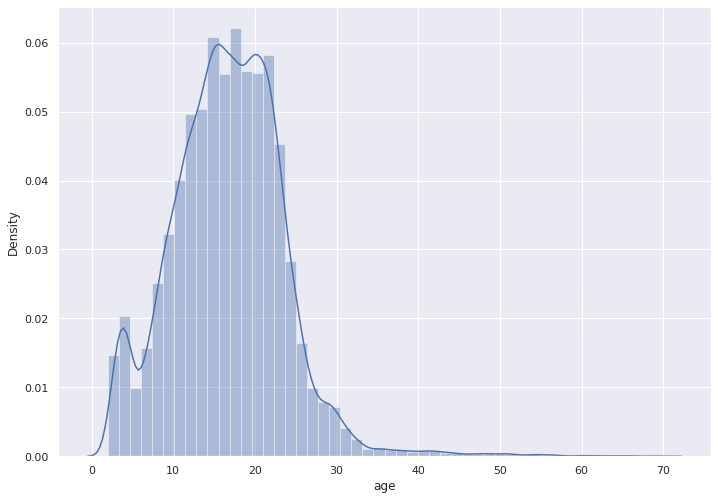

In [341]:
"""Visualizing the new data for age"""
sns.distplot(
    cars['age'],
)

<AxesSubplot:ylabel='age'>

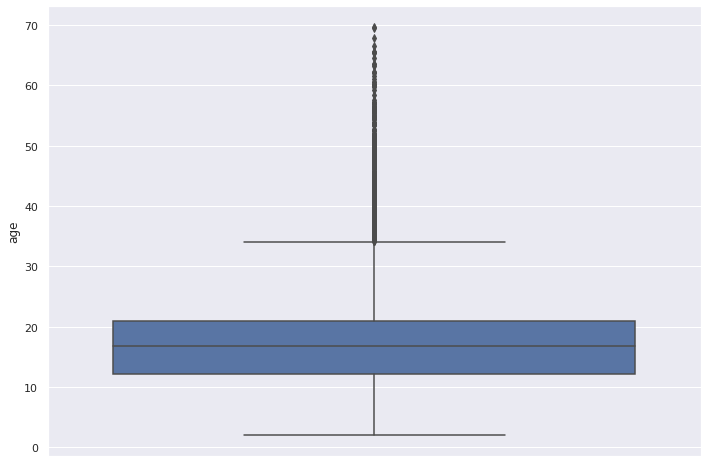

In [342]:
sns.boxplot(
    y='age',
    data=cars
)

/home/novasangeeth/work/pytest-workouts/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

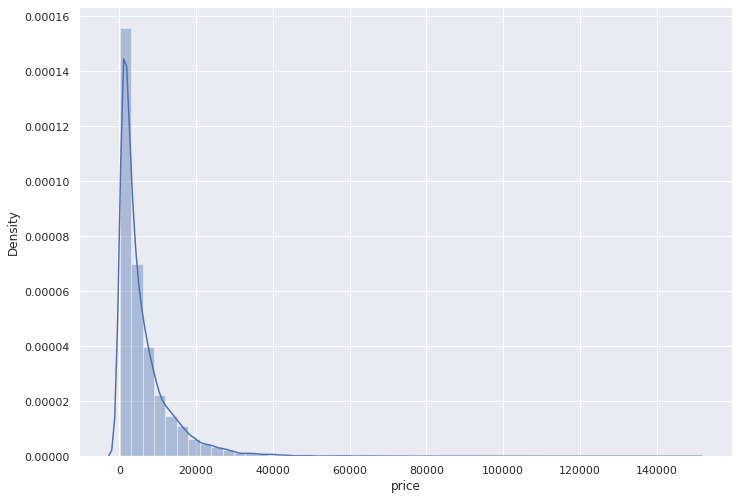

In [343]:
"""visualizing the new data for price"""
sns.distplot(
    cars['price'],
)

<AxesSubplot:ylabel='price'>

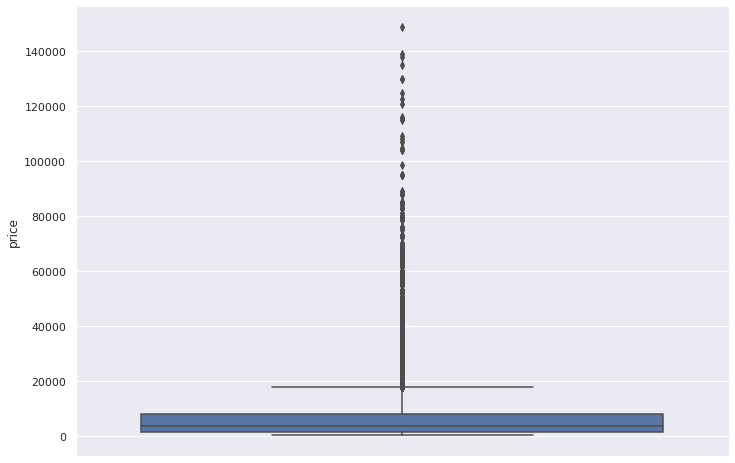

In [344]:
sns.boxplot(
    data=cars,
    y='price'
)

/home/novasangeeth/work/pytest-workouts/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

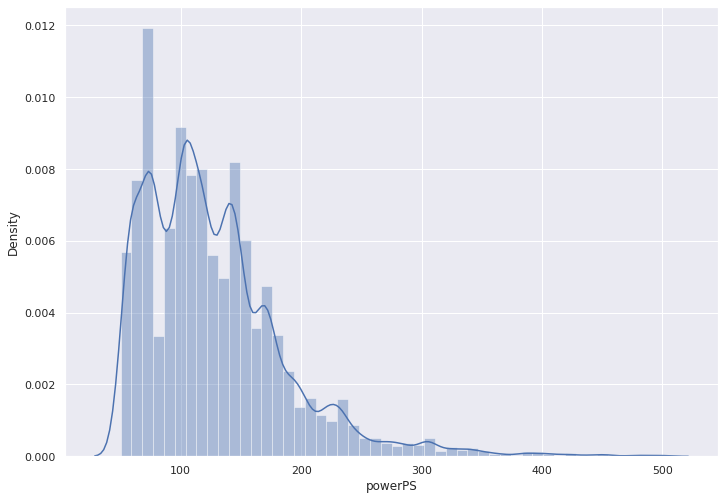

In [345]:
"""visualizing the new data for power"""
sns.distplot(
    cars['powerPS'],
)

<AxesSubplot:ylabel='powerPS'>

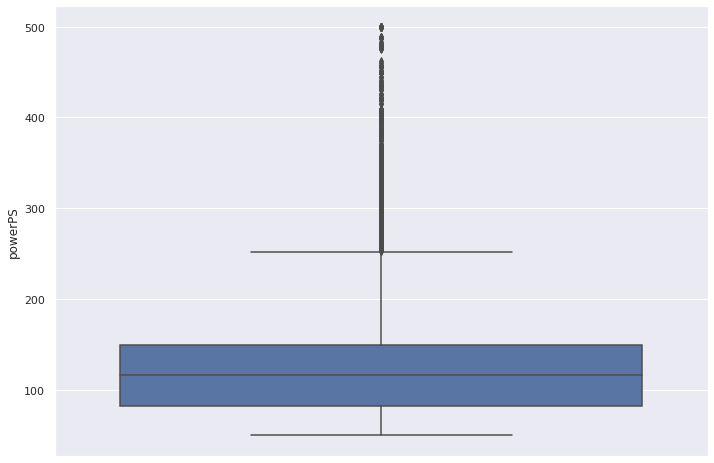

In [346]:
sns.boxplot(
    data=cars,
    y='powerPS'
)

<AxesSubplot:xlabel='age', ylabel='price'>

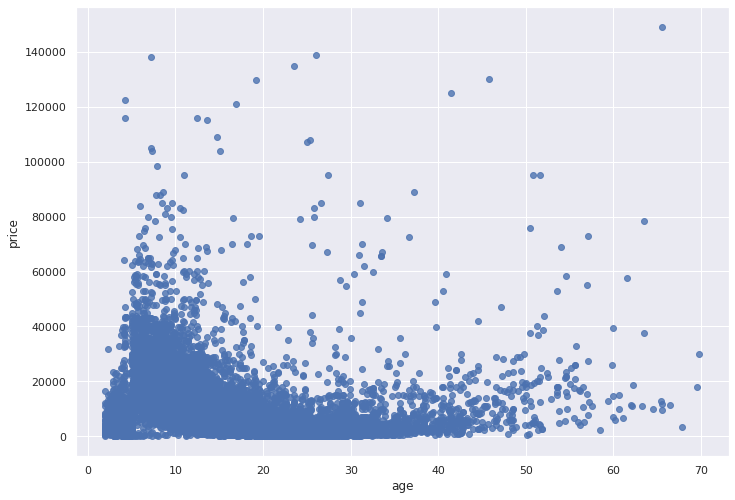

In [347]:
"""Plotting the age vs price in scatter plot"""
sns.regplot(
    x='age',
    y='price',
    scatter=True,
    fit_reg=False,
    data=cars
)


<AxesSubplot:xlabel='powerPS', ylabel='price'>

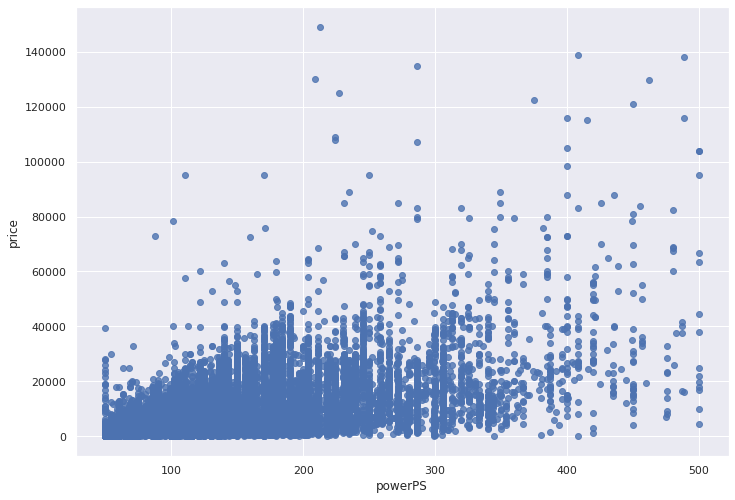

In [348]:
"""Plotting the power vs price in scatter plot"""
sns.regplot(
    x='powerPS',
    y='price',
    scatter=True,
    fit_reg=False,
    data=cars
)


In [349]:
"""find the value counts of seller"""
cars['seller'].value_counts()

private    42057
Name: seller, dtype: int64

<AxesSubplot:xlabel='seller', ylabel='count'>

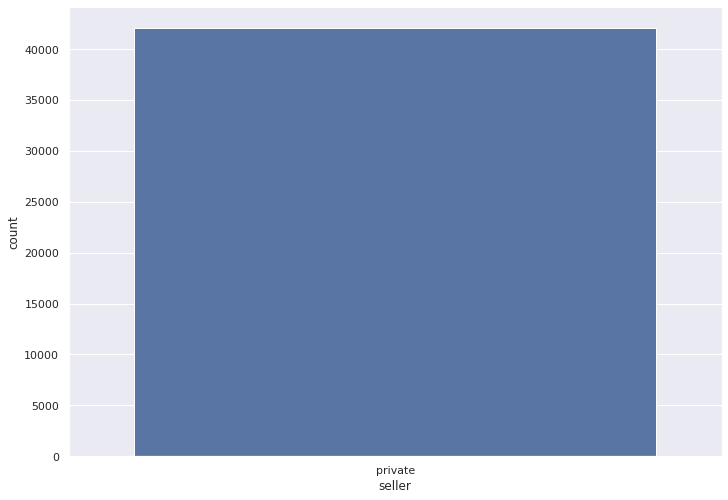

In [350]:
"""visualisze the count of seller"""
sns.countplot(
    x='seller',
    data=cars
)


In [351]:
"""Check the seller using crosstab"""
pd.crosstab(
    index=cars['seller'],
    columns='count',
    normalize=True
)


col_0,count
seller,
private,1.000


In [352]:
"""varianble for offertype"""
cars['offerType'].value_counts()

offer    42057
Name: offerType, dtype: int64

<AxesSubplot:xlabel='offerType', ylabel='count'>

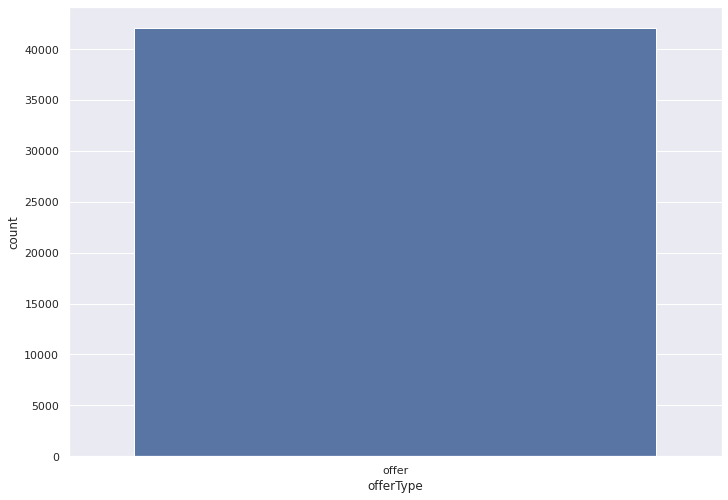

In [353]:
sns.countplot(
    x='offerType',
    data=cars
)

In [354]:
"""Checking the variable test."""
pd.crosstab(cars['abtest'], columns='count')

col_0,count
abtest,
control,20320
test,21737


<AxesSubplot:xlabel='abtest', ylabel='count'>

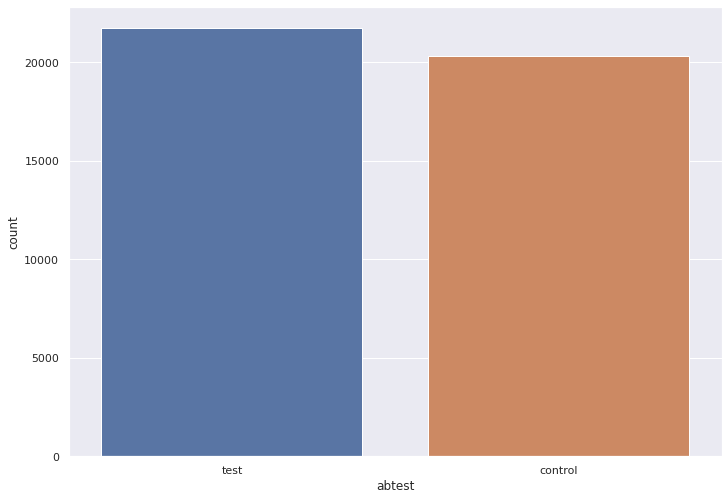

In [355]:
"""count plot for abtest"""
sns.countplot(
    x='abtest',
    data=cars
)

In [358]:
"""Checking the variable vehicleType."""
cars['vehicleType'].value_counts()
pd.crosstab(
    index=cars['vehicleType'],
    columns='count',
)


col_0,count
vehicleType,
bus,3595
cabrio,2759
coupe,2238
limousine,11689
others,316
small car,8806
station wagon,8058
suv,1804


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

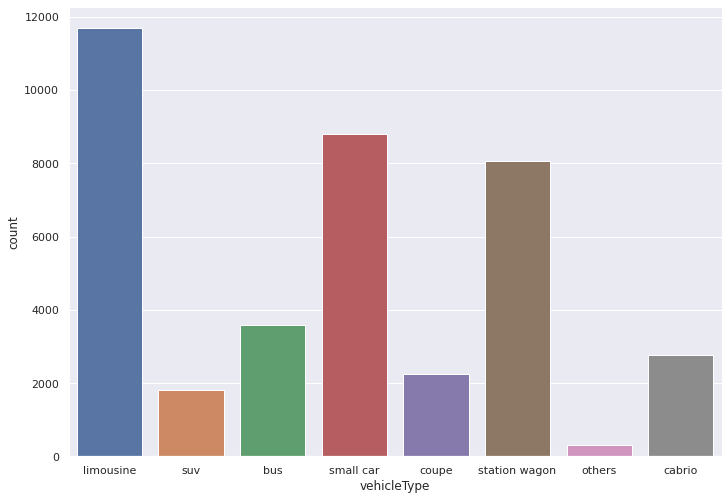

In [359]:
"""count plot for vehicleType"""
sns.countplot(
    x='vehicleType',
    data=cars
)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

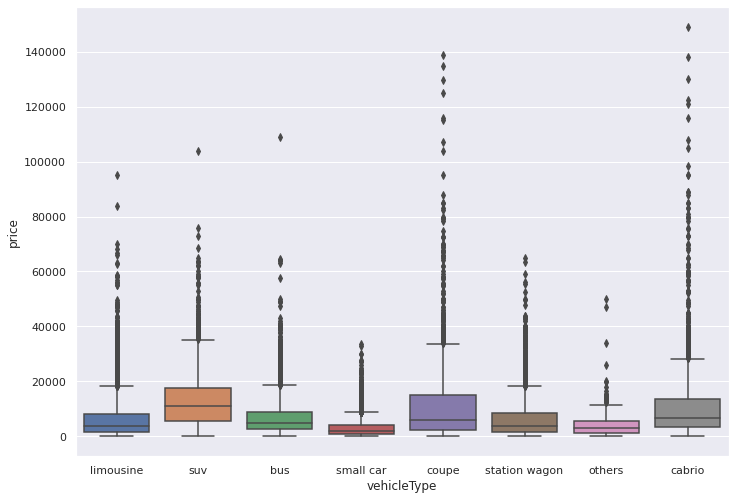

In [361]:
"""Box plot for vehicleType"""
sns.boxplot(
    x='vehicleType',
    y='price',
    data=cars
)


In [362]:
cars.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'age'],
      dtype='object')

In [365]:
"""Checking the variable for gearbox."""
# cars['gearbox'].value_counts()
pd.crosstab(
    columns='count',
    index=cars['gearbox']
)

col_0,count
gearbox,
automatic,9306
manual,32010


<AxesSubplot:xlabel='gearbox', ylabel='price'>

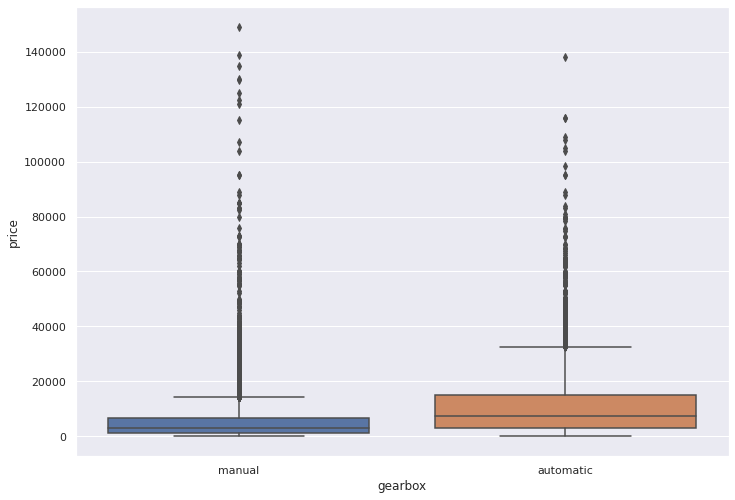

In [367]:
"""box plot for gearbox"""
sns.boxplot(
    x='gearbox',
    y='price',
    data=cars
)

<AxesSubplot:xlabel='gearbox', ylabel='count'>

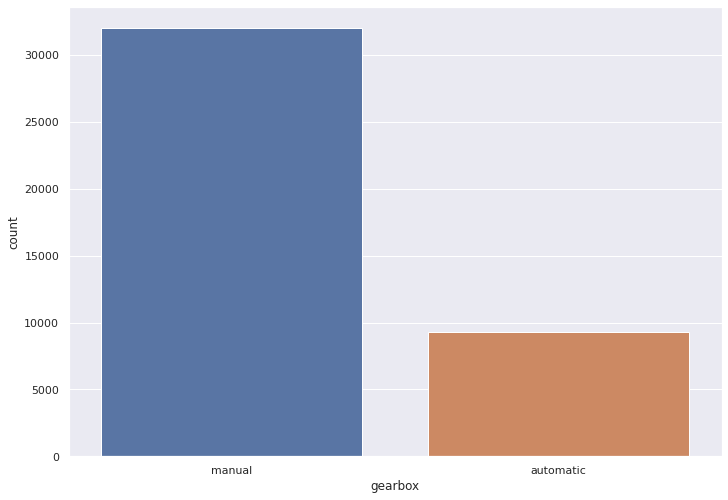

In [368]:
"""count plot for gearbox"""
sns.countplot(
    x='gearbox',
    data=cars
)

In [372]:
"""Checking the variable for model"""
# pd.crosstab(
#     index=cars['model'],
#     columns='count',
# )
print(cars['model'].value_counts())

golf                  3473
others                2817
3er                   2482
polo                  1389
astra                 1274
corsa                 1248
a4                    1230
passat                1200
c_klasse              1042
5er                   1012
e_klasse               907
a3                     826
a6                     737
focus                  701
transporter            628
fiesta                 619
2_reihe                601
1er                    527
a_klasse               497
vectra                 491
twingo                 463
3_reihe                436
fortwo                 433
clio                   432
touran                 421
mondeo                 388
punto                  361
ibiza                  349
megane                 339
zafira                 324
x_reihe                288
octavia                283
lupo                   276
cooper                 270
ka                     263
fabia                  251
clk                    241
c

<AxesSubplot:xlabel='model', ylabel='price'>

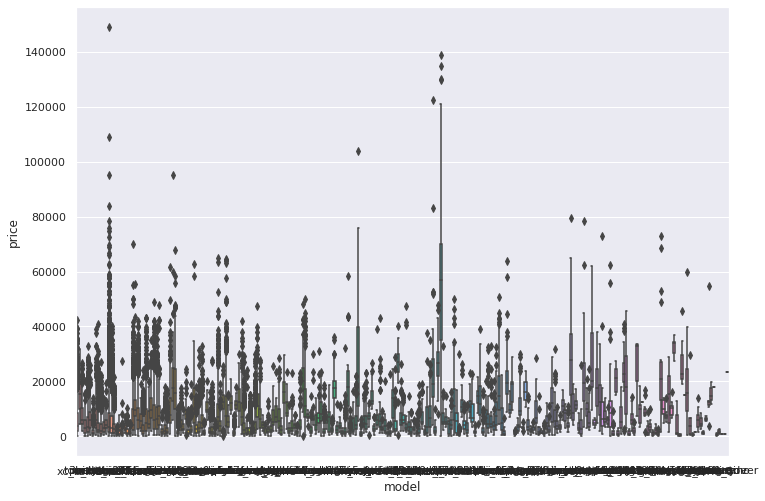

In [373]:
"""box plot for model"""
sns.boxplot(
    x='model',
    y='price',
    data=cars
)

<AxesSubplot:xlabel='model', ylabel='count'>

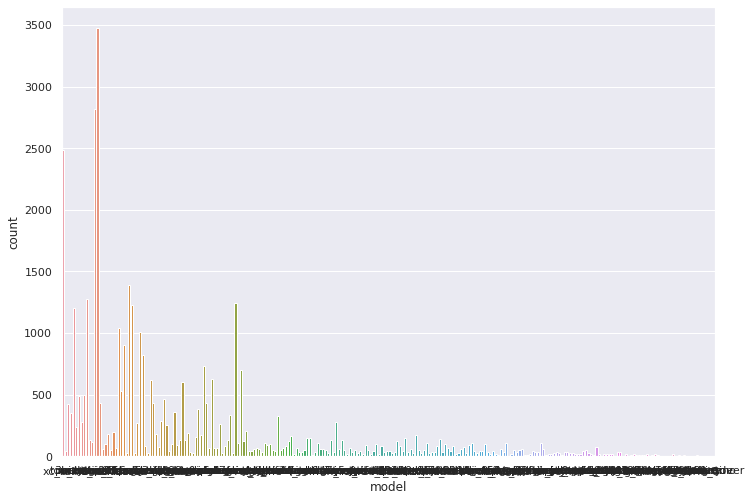

In [374]:
"""count plot for model"""
sns.countplot(
    x='model',
    data=cars
)

In [376]:
"""Checking the variable kilometer"""
cars['kilometer'].value_counts()
pd.crosstab(
    index=cars['kilometer'],
    columns='count',
)

col_0,count
kilometer,
5000,458
10000,197
20000,638
30000,695
40000,786
50000,915
60000,1076
70000,1159
80000,1353


<AxesSubplot:xlabel='kilometer', ylabel='price'>

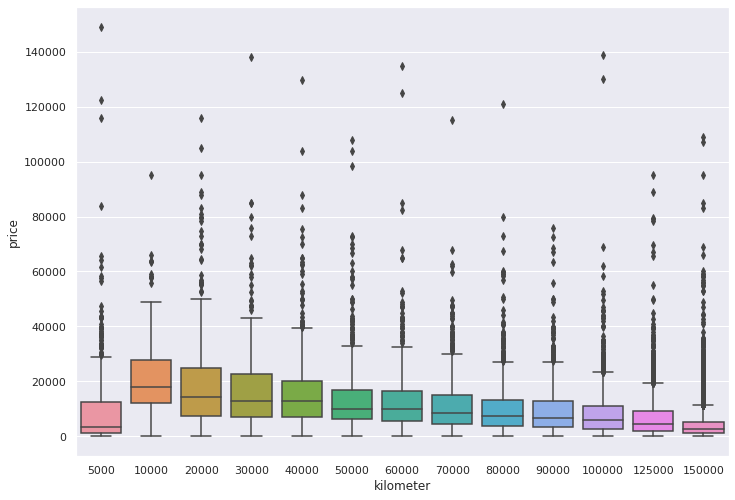

In [377]:
"""box plot for kilometer"""
sns.boxplot(
    x='kilometer',
    data=cars,
    y='price'
)

<AxesSubplot:xlabel='kilometer', ylabel='count'>

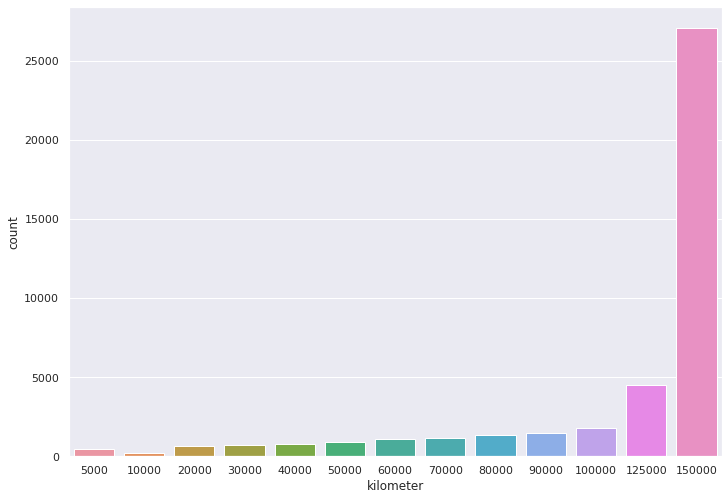

In [378]:
"""count plot for kilometer"""
sns.countplot(
    x='kilometer',
    data=cars
)

In [379]:
"""describing the data for kilometer"""
cars['kilometer'].describe()

count    42057.000
mean    125961.433
std      38972.089
min       5000.000
25%     125000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

In [380]:
"""checking the variable fueltype"""
pd.crosstab(
    index=cars['fuelType'],
    columns='count',
)

col_0,count
fuelType,
cng,70
diesel,12776
electro,4
hybrid,36
lpg,689
other,3
petrol,25982


<AxesSubplot:xlabel='fuelType', ylabel='price'>

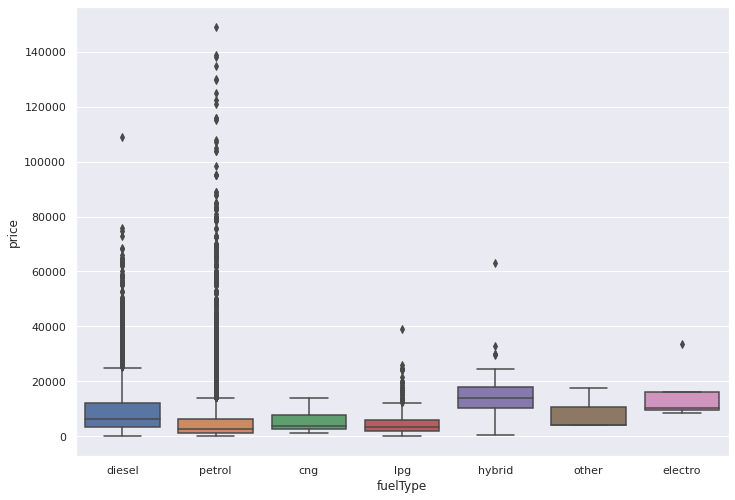

In [384]:
"""box plot for fueltype"""
sns.boxplot(
    x='fuelType',
    y='price',
    data=cars,
)

<AxesSubplot:xlabel='fuelType', ylabel='count'>

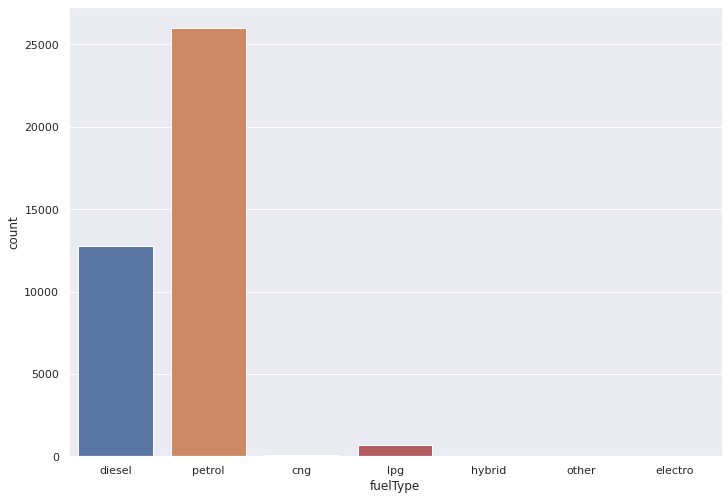

In [388]:
"""count plot for fueltype"""
sns.countplot(
    x='fuelType',
    data=cars,
)

In [390]:
"""checking the variable for brand"""
pd.crosstab(
    index=cars['brand'],
    columns='count',
)


'checking the variable for brand'

<AxesSubplot:xlabel='brand', ylabel='price'>

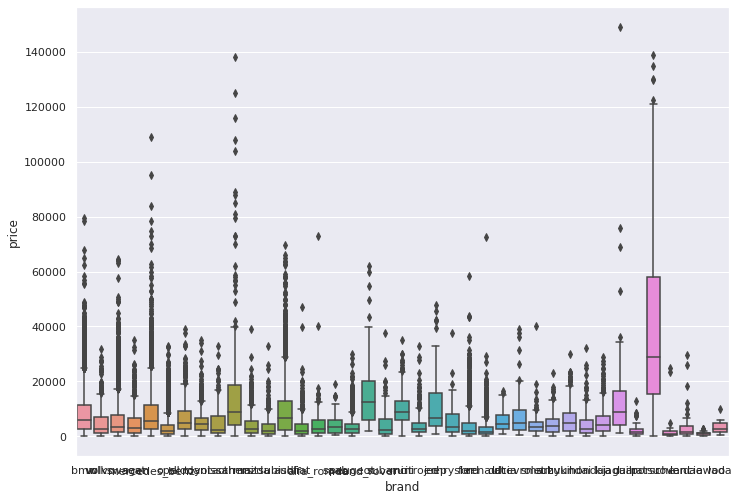

In [391]:
"""box plot for brand"""
sns.boxplot(
    x='brand',
    y='price',
    data=cars,
)


<AxesSubplot:xlabel='brand', ylabel='count'>

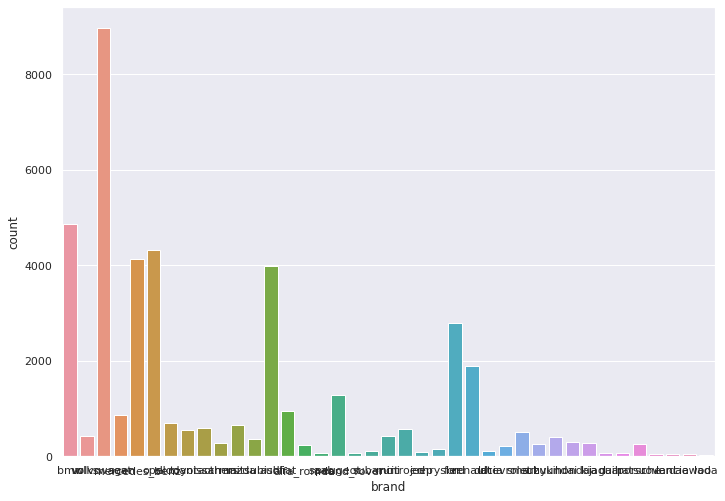

In [392]:
"""count plot for brand"""
sns.countplot(
    x='brand',
    data=cars,
)

In [393]:
"""checking the variable for notRepairedDamage"""
pd.crosstab(
    index=cars['notRepairedDamage'],
    columns='count',
)

col_0,count
notRepairedDamage,
no,32079
yes,3877


<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

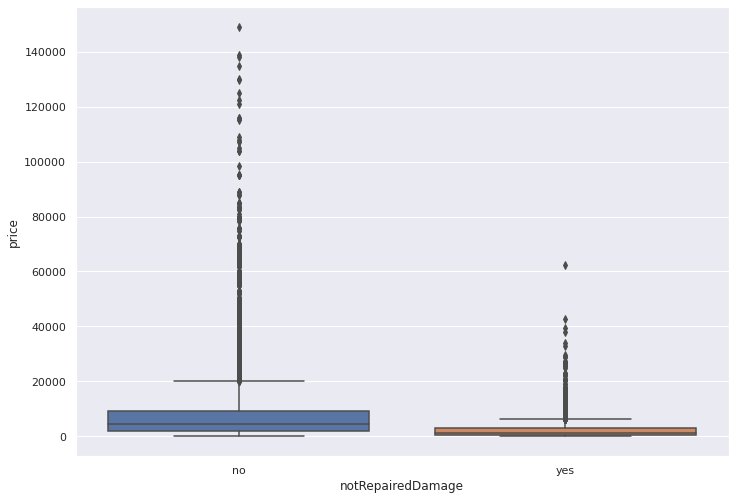

In [394]:
"""box plot for notRepairedDamage"""
sns.boxplot(
    x='notRepairedDamage',
    y='price',
    data=cars,
)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

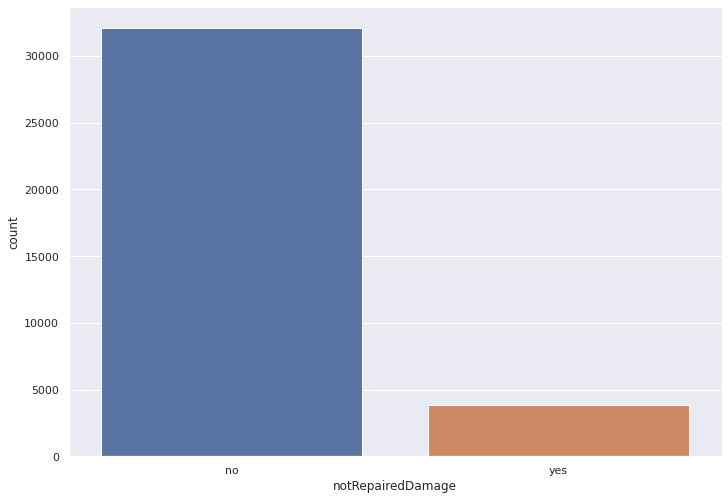

In [395]:
"""count plot for notRepairedDamage"""
sns.countplot(
    x='notRepairedDamage',
    data=cars,
)

In [399]:
"""Removing insignificant variables"""
cars = cars.drop(
    columns=[
        'seller',
        'abtest',
        'offerType',
    ]
)
cars.columns

In [400]:
"""Creating a new copy of the data"""
cleaned_data = cars.copy()
cleaned_data.describe()

,price,powerPS,kilometer,age
count,42057.000,42057.000,42057.000,42057.000
mean,6207.349,127.505,125961.433,16.734
std,7986.333,59.987,38972.089,6.898
min,100.000,50.000,5000.000,2.000
25%,1499.000,82.000,125000.000,12.250
50%,3500.000,116.000,150000.000,16.750
75%,7990.000,150.000,150000.000,21.000
max,149000.000,500.000,150000.000,69.750


In [404]:
"""Checking the correllation for the new cleaned data"""
corr = cleaned_data.corr()
round(corr, 3)
"""Usually check the first and last row of the correlation matrix"""

,price,powerPS,kilometer,age
price,1.000,0.575,-0.446,-0.343
powerPS,0.575,1.000,-0.023,-0.129
kilometer,-0.446,-0.023,1.000,0.324
age,-0.343,-0.129,0.324,1.000


In [413]:
"""
Check the correlation 
and locate the price 
and get the absolute value 
and sort them in desending order

ie 
returning the values in the first row in a desending order according to the price.
"""
cleaned_data.corr() \
    .loc[:'price'] \
        .abs() 
            # .sort_values(
            #     ascending=False,
            #     by='price',
            #     )[1:]


,price,powerPS,kilometer,age
price,1.000,0.575,0.446,0.343


<AxesSubplot:>

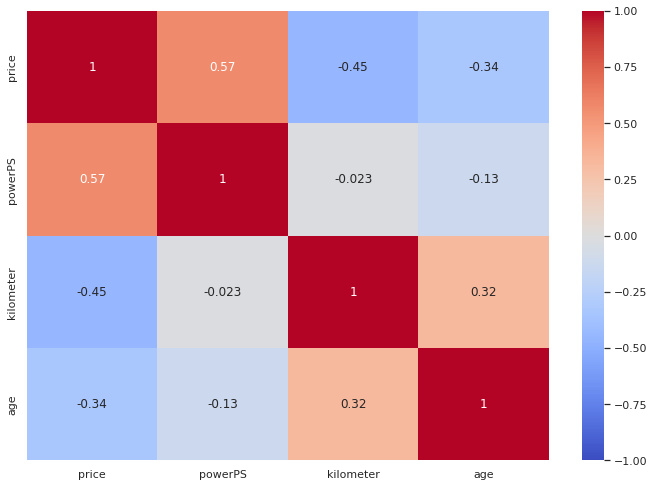

In [414]:
"""Create a heatmap for the cleaned data"""
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)


In [415]:
"""Removing the null vals from the cleaned data."""
cleaned_data.isnull().sum()

price                   0
vehicleType          2792
gearbox               741
powerPS                 0
model                1623
kilometer               0
fuelType             2497
brand                   0
notRepairedDamage    6101
age                     0
dtype: int64